In [1]:
using Gmsh: gmsh
using Gridap
using GridapGmsh
using Gridap.TensorValues
using PyPlot
using LinearAlgebra

In [2]:
const lsp = 0.020
hf = lsp/2.1             ##meshing parameter
h =  40*hf               ##meshing parameter
hfl = 25*hf
hfi = 5*hf
hfc = lsp/20
H = 4
L = 25
Th_ratio = 5.7
n = 5
si = 10
so = 20

@show t_AMZ = H/((n*Th_ratio) + (n-1))
@show t_ATZ = Th_ratio*t_AMZ
xo = (L-so)/2
xi = (L-si)/2
tn = 0.0075*L
hn = 0.15*H
sw = 0.04*L
FMW = 4*lsp

t_AMZ = H / (n * Th_ratio + (n - 1)) = 0.12307692307692308
t_ATZ = Th_ratio * t_AMZ = 0.7015384615384616


0.08

In [3]:
const E_ATZ = 390e3
const ν_ATZ = 0.22
G₁₂_ATZ = E_ATZ/(2*(1+ν_ATZ))

const E_AMZ = 280e3
const ν_AMZ = 0.22
G₁₂_AMZ = E_AMZ/(2*(1+ν_AMZ))

114754.09836065574

In [4]:
const Gc_ATZ = 0.025
const Gc_AMZ = 0.023
const η = 1e-10

1.0e-10

In [5]:
α_ATZ = 9.8e-6   ##Thermal Coefficient of A       #*****   
α_AMZ = 8.0e-6  ##Thermal Coefficient of AZ
ΔT = 0.0      ##Change in temperature

EATZ = E_ATZ/(1-ν_ATZ)
EAMZ = E_AMZ/(1-ν_AMZ)

ϵ_ATZ = ((α_AMZ - α_ATZ)*ΔT*EAMZ*(n - 1)*t_AMZ)/(EATZ*(n)*t_ATZ + EAMZ*(n - 1)*t_AMZ)
ϵ_AMZ = -((α_AMZ - α_ATZ)*ΔT*EATZ*(n)*t_ATZ)/(EATZ*(n)*t_ATZ + EAMZ*(n - 1)*t_AMZ)

ϵ_ATZYY = -2*ν_ATZ*ϵ_ATZ/(1-ν_ATZ)
ϵ_AMZYY = -2*ν_AMZ*ϵ_AMZ/(1-ν_AMZ)

-0.0

In [6]:
@show λ_ATZ = E_ATZ*ν_ATZ/((1+ν_ATZ)*(1-2*ν_ATZ))
@show λ_AMZ = E_AMZ*ν_AMZ/((1+ν_AMZ)*(1-2*ν_AMZ))
@show μ_ATZ = E_ATZ/(2*(1+ν_ATZ))
@show μ_AMZ = E_AMZ/(2*(1+ν_AMZ))

λ_ATZ = (E_ATZ * ν_ATZ) / ((1 + ν_ATZ) * (1 - 2ν_ATZ)) = 125585.48009367682
λ_AMZ = (E_AMZ * ν_AMZ) / ((1 + ν_AMZ) * (1 - 2ν_AMZ)) = 90163.9344262295
μ_ATZ = E_ATZ / (2 * (1 + ν_ATZ)) = 159836.0655737705
μ_AMZ = E_AMZ / (2 * (1 + ν_AMZ)) = 114754.09836065574


114754.09836065574

In [7]:
I2 = one(TensorValue{2,2,Float64})
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/2)*I4_sym
I4_dev = I4_sym - I4_vol

SymFourthOrderTensorValue{2, Float64, 9}(0.5, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.5)

In [1]:
cd("Results0_ATZ_5_AMZ_4_spectral(Tr5.7)")

In [9]:
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)

p1 = gmsh.model.geo.addPoint(-L/2, 0, 0, hfi)
p2 = gmsh.model.geo.addPoint(-L/2, t_ATZ, 0, hfi)
p3 = gmsh.model.geo.addPoint(-L/2, t_ATZ + t_AMZ, 0, hfi)
p4 = gmsh.model.geo.addPoint(-L/2, 2*t_ATZ + t_AMZ, 0, hfi)
p5 = gmsh.model.geo.addPoint(-L/2, 2*t_ATZ + 2*t_AMZ, 0, hfi)
p6 = gmsh.model.geo.addPoint(-L/2, 3*t_ATZ + 2*t_AMZ, 0, hfi)
p7 = gmsh.model.geo.addPoint(-L/2, 3*t_ATZ + 3*t_AMZ, 0, hfi)
p8 = gmsh.model.geo.addPoint(-L/2, 4*t_ATZ + 3*t_AMZ, 0, hfi)
p9 = gmsh.model.geo.addPoint(-L/2, 4*t_ATZ + 4*t_AMZ, 0, hfi)
p10 = gmsh.model.geo.addPoint(-L/2, H, 0, hfi)

p801 = gmsh.model.geo.addPoint(-L/2 + xi, H, 0, hfl)
p802 = gmsh.model.geo.addPoint(-L/2 + xi + 2*tn, H, 0, hfl)

p101 = gmsh.model.geo.addPoint(-L/2 + xo, 0, 0, hfl)

p111 = gmsh.model.geo.addPoint(-tn/2, 0, 0, hfl)

p11 = gmsh.model.geo.addPoint(0, hn, 0, hfc)
p12 = gmsh.model.geo.addPoint(0, t_ATZ, 0, hfi)
p13 = gmsh.model.geo.addPoint(0, t_ATZ + t_AMZ, 0, hfi)
p14 = gmsh.model.geo.addPoint(0, 2*t_ATZ + t_AMZ, 0, hfi)
p15 = gmsh.model.geo.addPoint(0, 2*t_ATZ + 2*t_AMZ, 0, hfi)
p16 = gmsh.model.geo.addPoint(0, 3*t_ATZ + 2*t_AMZ, 0, hfi)
p17 = gmsh.model.geo.addPoint(0, 3*t_ATZ + 3*t_AMZ, 0, hfi)
p18 = gmsh.model.geo.addPoint(0, 4*t_ATZ + 3*t_AMZ, 0, hfi)
p19 = gmsh.model.geo.addPoint(0, 4*t_ATZ + 4*t_AMZ, 0, hfi)
p20 = gmsh.model.geo.addPoint(0, H, 0, hf)

p112 = gmsh.model.geo.addPoint(tn/2, 0, 0, hfl)

p2101 = gmsh.model.geo.addPoint(L/2 - xo, 0, 0, hfl)

p21 = gmsh.model.geo.addPoint(L/2, 0, 0, hfi)
p22 = gmsh.model.geo.addPoint(L/2, t_ATZ, 0, hfi)
p23 = gmsh.model.geo.addPoint(L/2, t_ATZ + t_AMZ, 0, hfi)
p24 = gmsh.model.geo.addPoint(L/2, 2*t_ATZ + t_AMZ, 0, hfi)
p25 = gmsh.model.geo.addPoint(L/2, 2*t_ATZ + 2*t_AMZ, 0, hfi)
p26 = gmsh.model.geo.addPoint(L/2, 3*t_ATZ + 2*t_AMZ, 0, hfi)
p27 = gmsh.model.geo.addPoint(L/2, 3*t_ATZ + 3*t_AMZ, 0, hfi)
p28 = gmsh.model.geo.addPoint(L/2, 4*t_ATZ + 3*t_AMZ, 0, hfi)
p29 = gmsh.model.geo.addPoint(L/2, 4*t_ATZ + 4*t_AMZ, 0, hfi)
p30 = gmsh.model.geo.addPoint(L/2, H, 0, hfi)

p2801 = gmsh.model.geo.addPoint(L/2 - xi, H, 0, hfl)
p2802 = gmsh.model.geo.addPoint(L/2 - xi - 2*tn, H, 0, hfl)

l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p5)
l5 = gmsh.model.geo.addLine(p5, p6)
l6 = gmsh.model.geo.addLine(p6, p7)
l7 = gmsh.model.geo.addLine(p7, p8)
l8 = gmsh.model.geo.addLine(p8, p9)
l9 = gmsh.model.geo.addLine(p9, p10)


l111 = gmsh.model.geo.addLine(p1, p101)

l11 = gmsh.model.geo.addLine(p101, p111)
l12 = gmsh.model.geo.addLine(p2, p12)
l13 = gmsh.model.geo.addLine(p3, p13)
l14 = gmsh.model.geo.addLine(p4, p14)
l15 = gmsh.model.geo.addLine(p5, p15)
l16 = gmsh.model.geo.addLine(p6, p16)
l17 = gmsh.model.geo.addLine(p7, p17)
l18 = gmsh.model.geo.addLine(p8, p18)
l19 = gmsh.model.geo.addLine(p9, p19)
l20 = gmsh.model.geo.addLine(p802, p20)

l181 = gmsh.model.geo.addLine(p10, p801)
l182 = gmsh.model.geo.addLine(p801, p802)

l211 = gmsh.model.geo.addLine(p111, p11)
l212 = gmsh.model.geo.addLine(p112, p11)
l21 = gmsh.model.geo.addLine(p11, p12)
l22 = gmsh.model.geo.addLine(p12, p13)
l23 = gmsh.model.geo.addLine(p13, p14)
l24 = gmsh.model.geo.addLine(p14, p15)
l25 = gmsh.model.geo.addLine(p15, p16)
l26 = gmsh.model.geo.addLine(p16, p17)
l27 = gmsh.model.geo.addLine(p17, p18)
l28 = gmsh.model.geo.addLine(p18, p19)
l29 = gmsh.model.geo.addLine(p19, p20)

l31 = gmsh.model.geo.addLine(p112, p2101)
l311 = gmsh.model.geo.addLine(p2101, p21)
l32 = gmsh.model.geo.addLine(p12, p22)
l33 = gmsh.model.geo.addLine(p13, p23)
l34 = gmsh.model.geo.addLine(p14, p24)
l35 = gmsh.model.geo.addLine(p15, p25)
l36 = gmsh.model.geo.addLine(p16, p26)
l37 = gmsh.model.geo.addLine(p17, p27)
l38 = gmsh.model.geo.addLine(p18, p28)
l39 = gmsh.model.geo.addLine(p19, p29)
l40 = gmsh.model.geo.addLine(p20, p2802)

l382 = gmsh.model.geo.addLine(p2802, p2801)
l381 = gmsh.model.geo.addLine(p2801, p30)

l41 = gmsh.model.geo.addLine(p21, p22)
l42 = gmsh.model.geo.addLine(p22, p23)
l43 = gmsh.model.geo.addLine(p23, p24)
l44 = gmsh.model.geo.addLine(p24, p25)
l45 = gmsh.model.geo.addLine(p25, p26)
l46 = gmsh.model.geo.addLine(p26, p27)
l47 = gmsh.model.geo.addLine(p27, p28)
l48 = gmsh.model.geo.addLine(p28, p29)
l49 = gmsh.model.geo.addLine(p29, p30)


cl1 = gmsh.model.geo.addCurveLoop([l111,l11,l211,l21, -l12, -l1])
ps1 = gmsh.model.geo.addPlaneSurface([cl1])

cl2 = gmsh.model.geo.addCurveLoop([l12, l22, -l13, -l2])
ps2 = gmsh.model.geo.addPlaneSurface([cl2])

cl3 = gmsh.model.geo.addCurveLoop([l13, l23, -l14, -l3])
ps3 = gmsh.model.geo.addPlaneSurface([cl3])

cl4 = gmsh.model.geo.addCurveLoop([l14, l24, -l15, -l4])
ps4 = gmsh.model.geo.addPlaneSurface([cl4])

cl5 = gmsh.model.geo.addCurveLoop([l15, l25, -l16, -l5])
ps5 = gmsh.model.geo.addPlaneSurface([cl5])

cl6 = gmsh.model.geo.addCurveLoop([l16, l26, -l17, -l6])
ps6 = gmsh.model.geo.addPlaneSurface([cl6])

cl7 = gmsh.model.geo.addCurveLoop([l17, l27, -l18,-l7])
ps7 = gmsh.model.geo.addPlaneSurface([cl7])

cl8 = gmsh.model.geo.addCurveLoop([l18, l28, -l19,-l8])
ps8 = gmsh.model.geo.addPlaneSurface([cl8])

cl9 = gmsh.model.geo.addCurveLoop([l19, l29, -l20,-l182, -l181, -l9])
ps9 = gmsh.model.geo.addPlaneSurface([cl9])



cl10 = gmsh.model.geo.addCurveLoop([l31,l311,l41,-l32, -l21, -l212])
ps10 = gmsh.model.geo.addPlaneSurface([cl10])

cl11 = gmsh.model.geo.addCurveLoop([l32, l42, -l33, -l22])
ps11 = gmsh.model.geo.addPlaneSurface([cl11])

cl12 = gmsh.model.geo.addCurveLoop([l33, l43, -l34, -l23])
ps12 = gmsh.model.geo.addPlaneSurface([cl12])

cl13 = gmsh.model.geo.addCurveLoop([l34, l44, -l35, -l24])
ps13 = gmsh.model.geo.addPlaneSurface([cl13])

cl14 = gmsh.model.geo.addCurveLoop([l35, l45, -l36, -l25])
ps14 = gmsh.model.geo.addPlaneSurface([cl14])

cl15 = gmsh.model.geo.addCurveLoop([l36, l46, -l37, -l26])
ps15 = gmsh.model.geo.addPlaneSurface([cl15])

cl16 = gmsh.model.geo.addCurveLoop([l37, l47, -l38, -l27])
ps16 = gmsh.model.geo.addPlaneSurface([cl16])

cl17 = gmsh.model.geo.addCurveLoop([l38, l48, -l39,-l28])
ps17 = gmsh.model.geo.addPlaneSurface([cl17])

cl18= gmsh.model.geo.addCurveLoop([l39, l49, -l381, -l382, -l40, -l29])
ps18= gmsh.model.geo.addPlaneSurface([cl18])



pg1 = gmsh.model.addPhysicalGroup(2, [ps1, ps3, ps5, ps7, ps9,ps10, ps12, ps14, ps16, ps18])
pg2 = gmsh.model.addPhysicalGroup(2, [ps2,ps4, ps6, ps8, ps11,ps13, ps15, ps17])
pg3 = gmsh.model.addPhysicalGroup(1, [l182,l382])
pg4 = gmsh.model.addPhysicalGroup(0, [p101])
pg5 = gmsh.model.addPhysicalGroup(0, [p2101])

gmsh.model.setPhysicalName(2, pg1, "laminateATZ")
gmsh.model.setPhysicalName(2, pg2, "laminateAMZ")
gmsh.model.setPhysicalName(1, pg3, "DirichletLoadBoundary")
gmsh.model.setPhysicalName(0, pg4, "LeftSupport")
gmsh.model.setPhysicalName(0, pg5, "RightSupport")

gmsh.model.mesh.field.add("Box", 21)
gmsh.model.mesh.field.setNumber(21, "VIn", hf)
gmsh.model.mesh.field.setNumber(21, "VOut", h)
gmsh.model.mesh.field.setNumber(21, "XMin", (-3*tn-3*FMW))
gmsh.model.mesh.field.setNumber(21, "XMax", (+3*tn+3*FMW))
gmsh.model.mesh.field.setNumber(21, "YMin",0)
gmsh.model.mesh.field.setNumber(21, "YMax",t_ATZ - 2*t_AMZ)


gmsh.model.mesh.field.add("Box", 22)
gmsh.model.mesh.field.setNumber(22, "VIn", hf)
gmsh.model.mesh.field.setNumber(22, "VOut", h)
gmsh.model.mesh.field.setNumber(22, "XMin", (-7*tn-7*FMW))
gmsh.model.mesh.field.setNumber(22, "XMax", (+7*tn+7*FMW))
gmsh.model.mesh.field.setNumber(22, "YMin",t_ATZ - 2*t_AMZ)
gmsh.model.mesh.field.setNumber(22, "YMax",3*t_ATZ + 3*t_AMZ)

gmsh.model.mesh.field.add("Box", 23)
gmsh.model.mesh.field.setNumber(23, "VIn", hf)
gmsh.model.mesh.field.setNumber(23, "VOut", h)
gmsh.model.mesh.field.setNumber(23, "XMin", (-10*tn-10*FMW))
gmsh.model.mesh.field.setNumber(23, "XMax", (+10*tn+10*FMW))
gmsh.model.mesh.field.setNumber(23, "YMin",3*t_ATZ + 3*t_AMZ)
gmsh.model.mesh.field.setNumber(23, "YMax",H)


gmsh.model.mesh.field.add("Min",24)
gmsh.model.mesh.field.setNumbers(24, "FieldsList",[21,22,23])
gmsh.model.mesh.field.setAsBackgroundMesh(24)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("BeamWithPSLayer.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 20%] Meshing curve 7 (Line)
Info    : [ 20%] Meshing curve 8 (Line)
Info    : [ 20%] Meshing curve 9 (Line)
Info    : [ 20%] Meshing curve 10 (Line)
Info    : [ 20%] Meshing curve 11 (Line)
Info    : [ 20%] Meshing curve 12 (Line)
Info    : [ 30%] Meshing curve 13 (Line)
Info    : [ 30%] Meshing curve 14 (Line)
Info    : [ 30%] Meshing curve 15 (Line)
Info    : [ 30%] Meshing curve 16 (Line)
Info    : [ 30%] Meshing curve 17 (Line)
Info    : [ 40%] Meshing curve 18 (Line)
Info    : [ 40%] Meshing curve 19 (Line)
Info    : [ 40%] Meshing curve 20 (Line)
Info    : [ 40%] Meshing curve 21 (Line)
Info    : [ 40%] Meshing curve 22 (Line)
Info    : [ 40%] Meshing curve 23 (Line)
Info    : [ 50%] Meshing curve 24 (Line)
I

In [10]:
model = GmshDiscreteModel("BeamWithPSLayer.msh")
writevtk(model,"BeamWithPSLayer")

Info    : Reading 'BeamWithPSLayer.msh'...
Info    : 111 entities
Info    : 246007 nodes
Info    : 490715 elements
Info    : Done reading 'BeamWithPSLayer.msh'


3-element Vector{Vector{String}}:
 ["BeamWithPSLayer_0.vtu"]
 ["BeamWithPSLayer_1.vtu"]
 ["BeamWithPSLayer_2.vtu"]

In [11]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension);

In [12]:
order = 1
degree = 2*order
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [13]:
const ATZ_tag = get_tag_from_name(labels,"laminateATZ")
const AMZ_tag = get_tag_from_name(labels,"laminateAMZ")

5

In [14]:
function Gc(s_id,tag)
        if tag == ATZ_tag          
            return  Gc_ATZ*s_id
        elseif tag == AMZ_tag    
            return Gc_AMZ*s_id
        end
end

Gc (generic function with 1 method)

In [15]:
function ϵRes(tag)
        if tag == ATZ_tag          
            return (SymTensorValue(ϵ_ATZ, 0, ϵ_ATZYY))
        elseif tag == AMZ_tag    
            return (SymTensorValue(ϵ_AMZ, 0, ϵ_AMZYY))
        end
end

ϵRes (generic function with 1 method)

In [16]:
function ElasFourthOrderConstTensor(E₁,E₂,ν₁₂,ν₂₁,G₁₂,PlanarState)
    # 1 for Plane Stress and 2 Plane Strain Condition 
  if PlanarState == 1
      C1111 = E₁/(1-ν₁₂*ν₂₁)
      C1122 = (ν₂₁*E₁)/(1-ν₁₂*ν₂₁)
      C1112 = 0.0
      C2222 = E₂/(1-ν₁₂*ν₂₁)
      C2212 = 0.0
      C1212 = G₁₂     
  elseif PlanarState == 2
      C1111 = (E₁*(1-ν₁₂*ν₂₁))/((1+ν₁₂)*(1-ν₁₂-2*ν₁₂*ν₂₁))
      C1122 = (ν₂₁*E₁)/(1-ν₁₂-2*ν₁₂*ν₂₁)
      C1112 = 0.0
      C2222 = (E₂*(1-ν₁₂))/(1-ν₁₂-2*ν₁₂*ν₂₁)
      C2212 = 0.0
      C1212 = G₁₂ 
  end
  C_ten = SymFourthOrderTensorValue(C1111,C1112,C1122,C1112,C1212,C2212,C1122,C2212,C2222)
    return  C_ten
end
const C_ATZ = ElasFourthOrderConstTensor(E_ATZ,E_ATZ,ν_ATZ,ν_ATZ,G₁₂_ATZ,2)
const C_AMZ = ElasFourthOrderConstTensor(E_AMZ,E_AMZ,ν_AMZ,ν_AMZ,G₁₂_AMZ,2)

SymFourthOrderTensorValue{2, Float64, 9}(319672.131147541, 0.0, 90163.9344262295, 0.0, 114754.09836065574, 0.0, 90163.9344262295, 0.0, 319672.131147541)

In [17]:
function σ_elas(ϵEl,tag)
    if tag == ATZ_tag
        return C_ATZ ⊙ ϵEl
    elseif tag == AMZ_tag
        return C_AMZ ⊙ ϵEl
    end
end

function σ_mod(ε, ε_in, s_in, tag)
        ϵElas_in = ε_in - ϵRes(tag)
        ϵElas = ε - ϵRes(tag)
            σM = (s_in^2 + η)*σ_elas(ϵElas,tag)
    return σM
end

σ_mod (generic function with 1 method)

In [18]:
function σTot(ε,tag)
    if tag == ATZ_tag
        return C_ATZ ⊙ ε
    elseif tag == AMZ_tag
        return C_AMZ ⊙ ε
    end
end

function σTot_mod(ε, ε_in, s_in, tag)
            σT = (s_in^2 + η)*σTot(ε,tag)
    return σT
end

σTot_mod (generic function with 1 method)

In [19]:
function σRes(tag)
        if tag == ATZ_tag          
            return C_ATZ ⊙ ϵRes(tag)
        elseif tag == AMZ_tag    
            return C_AMZ ⊙ ϵRes(tag)
        end
end


function σRes_Mod(s_in,tag)
        ϵR = ϵRes(tag)
        σR = (s_in^2 + η)*σRes(tag)
    return σR
end

σRes_Mod (generic function with 1 method)

In [20]:
function Eigen(ε)
    εArray = get_array(ε)
    Λ, P = eigen(εArray)
    ε1 = Λ[1]
    ε2 = Λ[2]
    if ε1 >= 0 &&  ε2 >= 0
        Λpos = [ε1 0; 0 ε2]
        Λneg = [0 0; 0 0]
    elseif ε1 >= 0 &&  ε2 < 0
        Λpos = [ε1 0; 0 0]
        Λneg = [0 0; 0 ε2]
    elseif ε1 < 0 &&  ε2 >= 0
        Λpos = [0 0; 0 ε2]
        Λneg = [ε1 0; 0 0]
    elseif ε1 < 0 &&  ε2 < 0
        Λpos = [0 0; 0 0]
        Λneg = [ε1 0; 0 ε2]
    end
    εPos = TensorValue(P*Λpos*P')
    εNeg = TensorValue(P*Λneg*P')
    return εPos, εNeg
end

Eigen (generic function with 1 method)

In [21]:
function ψPos(ε_in,tag)
    ϵ_in = ε_in - ϵRes(tag)
    εPos, εNeg = Eigen(ϵ_in)
    ψPlus = 0.5*(εPos ⊙ σ_elas(ϵ_in,tag))
    return ψPlus
end

ψPos (generic function with 1 method)

In [22]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
  ψPlus_in = ψhPos_in
  if ψPlus_in >= ψPlusPrev_in
    ψPlus_out = ψPlus_in
  else
    ψPlus_out = ψPlusPrev_in
  end
  true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

In [23]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = Gridap.solve(op)
  qh
end

project (generic function with 1 method)

In [24]:
sId = CellState(1.0,dΩ)
shId = project(sId,model,dΩ,order)

SingleFieldFEFunction():
 num_cells: 490709
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 6808973779487835566

In [25]:
LoadTagId = get_tag_from_name(labels,"DirichletLoadBoundary")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 4
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 5433765954390731405

In [26]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;
  conformity=:H1)
U_PF = TrialFESpace(V0_PF)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 490709
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 6808973779487835566

In [27]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["LeftSupport","RightSupport","DirichletLoadBoundary"],
          dirichlet_masks=[(true,true), (false,true), (false,true)])

uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 490709
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 6808973779487835566

In [28]:
function  stepPhaseField(uh_in,ψPlusPrev_in)

        a_PF(s,ϕ) = ∫( (Gc∘(shId,mat_tags))*lsp*∇(ϕ)⋅ ∇(s) + 2*ψPlusPrev_in*s*ϕ + ((Gc∘(shId,mat_tags))/lsp)*s*ϕ )*dΩ
        b_PF(ϕ) = ∫( ((Gc∘(shId,mat_tags))/lsp)*ϕ )*dΩ  
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = solve(op_PF) 
    
    return sh_out  
end

stepPhaseField (generic function with 1 method)

In [29]:
function   stepDisp(uh_in,sh_in,uApp)
        uApp1(x) = VectorValue(0.0,0.0)
        uApp2(x) = VectorValue(0.0,0.0)
        uApp3(x) = VectorValue(0.0,-uApp)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2,uApp3])

        a_Disp(u,v) = ∫( (ε(v) ⊙ (σTot_mod∘(ε(u),ε(uh_in),sh_in,mat_tags)) ) )*dΩ
        b_Disp(v) = ∫( (ε(v) ⊙ (σRes_Mod∘(sh_in,mat_tags)) ) )*dΩ
        op_Disp = AffineFEOperator(a_Disp,b_Disp,U_Disp,V0_Disp)
        uh_out = solve(op_Disp)
    return uh_out
end

stepDisp (generic function with 1 method)

In [30]:
uApp = 0
uAppMax = 0.015
delu = 0.01/100
innerMax = 10
count = 0
Load = Float64[]
Displacement = Float64[]

sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ψPlusPrev = CellState(0.0,dΩ)

while uApp .< uAppMax 
        
    uApp = uApp .+ delu
    count = count .+ 1
    
    #=if  uApp >=5e-15  && uApp <= 0.0025
        delu = 5e-4
    elseif uApp > 0.0025
        delu = 1e-4
    end=#
   
    print("\n Entering displacemtent step$count :", float(uApp))
    
   for inner = 1:innerMax
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        
        err = abs(sum(∫( (Gc∘(shId,mat_tags))*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh + ((Gc∘(shId,mat_tags))/lsp)*sh*sh)*dΩ-∫( ((Gc∘(shId,mat_tags))/lsp)*sh)*dΩ))/abs(sum(∫( ((Gc∘(shId,mat_tags))/lsp)*sh)*dΩ))

        print("\n error = ",float(err))
        
        sh = stepPhaseField(uh,ψhPlusPrev) 
        uh = stepDisp(uh,sh,uApp)
        
        ψhPos_in = ψPos∘(ε(uh),mat_tags)
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
        
        if err < 1e-8
            break 
        end 
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σ_mod∘(ε(uh),ε(uh),sh,mat_tags)) ) *dΓ_Load)
    
    push!(Load, -Node_Force[2])
    push!(Displacement, uApp)
    if mod(count,5) == 0
         writevtk(Ω,"results_PhaseFieldBeamWithNotchWithResStress$count",cellfields=
        ["uh"=>uh,"s"=>sh , "epsi"=>ε(uh),"sigma"=>σ_elas∘(ε(uh),mat_tags)])
    end
end


 Entering displacemtent step1 :0.0001
 error = 5.583601597687805e-17
 Entering displacemtent step2 :0.0002
 error = 6.843036501698646e-7
 error = 2.0529098448462532e-6
 error = 8.49521483383566e-11
 Entering displacemtent step3 :0.00030000000000000003
 error = 5.836614342019502e-14
 Entering displacemtent step4 :0.0004
 error = 3.4214517962779914e-6
 error = 4.790218948302732e-6
 error = 7.938172183177178e-10
 Entering displacemtent step5 :0.0005
 error = 2.1861968161188008e-12
 Entering displacemtent step6 :0.0006000000000000001
 error = 6.158195324097933e-6
 error = 7.527886222155784e-6
 error = 2.8148176114651006e-9
 Entering displacemtent step7 :0.0007000000000000001
 error = 1.7539633860584537e-11
 Entering displacemtent step8 :0.0008000000000000001
 error = 8.894114527397765e-6
 error = 1.026618579402077e-5
 error = 6.85547050919188e-9
 Entering displacemtent step9 :0.0009000000000000002
 error = 7.65864427859288e-11
 Entering displacemtent step10 :0.0010000000000000002
 error =

 error = 8.577010533250039e-7
 error = 8.115393973411354e-7
 error = 7.695345125876694e-7
 error = 7.286335426563302e-7
 error = 6.884945152441629e-7
 Entering displacemtent step70 :0.007000000000000005
 error = 6.495680150477463e-7
 error = 1.0512102519888206e-6
 error = 7.953371875741336e-7
 error = 7.240988852765419e-7
 error = 6.77320473689561e-7
 error = 6.368531137588846e-7
 error = 5.983329499537766e-7
 error = 5.614446552796062e-7
 error = 5.259822148904564e-7
 error = 4.933694862086493e-7
 Entering displacemtent step71 :0.007100000000000006
 error = 4.6399227120867683e-7
 error = 8.392725198375144e-7
 error = 6.102091384714639e-7
 error = 5.52951920273572e-7
 error = 5.185014460777278e-7
 error = 4.904515319927025e-7
 error = 4.650998742724713e-7
 error = 4.4193473222675284e-7
 error = 4.2214475307797153e-7
 error = 4.0471078902821766e-7
 Entering displacemtent step72 :0.007200000000000006
 error = 3.885880349657955e-7
 error = 7.504371505078602e-7
 error = 5.458293215301973e-

 error = 6.423823821002797e-8
 error = 5.670573447541724e-8
 error = 5.0081925071430484e-8
 error = 4.419767671854194e-8
 error = 3.892213384489045e-8
 error = 3.4218979584423624e-8
 Entering displacemtent step116 :0.011599999999999985
 error = 3.003812296180408e-8
 error = 1.2673906383089387e-7
 error = 8.106408676060755e-8
 error = 6.673421357446162e-8
 error = 5.732706481674643e-8
 error = 4.962860865431337e-8
 error = 4.298237111950305e-8
 error = 3.7180226513530644e-8
 error = 3.211792736465101e-8
 error = 2.7709502257660363e-8
 Entering displacemtent step117 :0.011699999999999985
 error = 2.387749098721128e-8
 error = 1.2085870618419277e-7
 error = 7.555987394569783e-8
 error = 6.099114224504797e-8
 error = 5.143422990395694e-8
 error = 4.3753887506152276e-8
 error = 3.727728692916595e-8
 error = 3.1741652295932376e-8
 error = 2.70049289793005e-8
 error = 2.2956357050305196e-8
 Entering displacemtent step118 :0.011799999999999984
 error = 1.9500930095969555e-8
 error = 1.16585759

In [31]:
writevtk(Ω,"results_PhaseFieldBeamWithNotchWithResStress$count",cellfields=
        ["uh"=>uh,"s"=>sh , "epsi"=>ε(uh),"sigma"=>σ_elas∘(ε(uh),mat_tags)])

(["results_PhaseFieldBeamWithNotchWithResStress151.vtu"],)

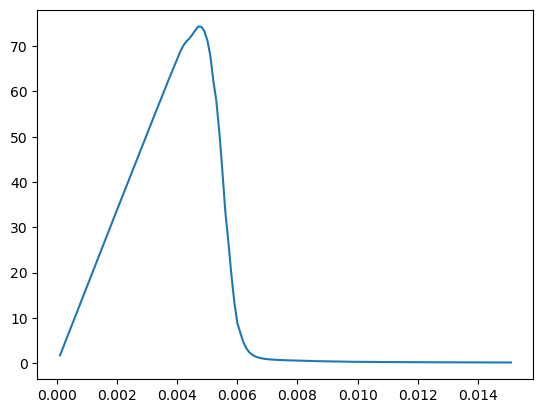

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6e05f626e0>

In [32]:
plot(Displacement,Load)

In [2]:
cd("../Load-DispData")

In [33]:
using DelimitedFiles
Disp = writedlm( "DispDataWithResStress_9L_0deg(Tr5.7).csv",  Displacement, ',')
Force = writedlm("LoadDataWithResStress_9L_0deg(Tr5.7).csv",  Load, ',')